In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

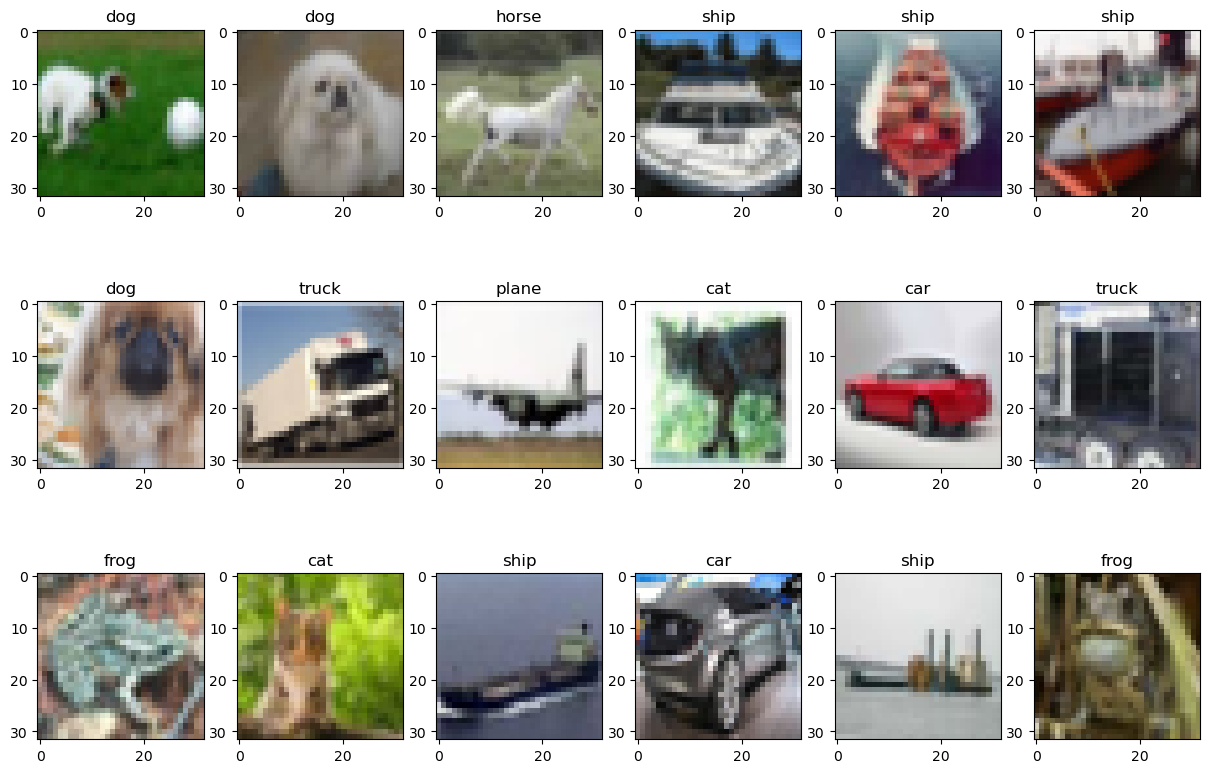

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_samples = len(x_train)
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, num_samples)
    # Show the image and the label
    plt.imshow(x_train[idx])
    plt.title(classes[int(y_train[idx])])

(Text(0.5, 0, 'Dataset class ID'), Text(0, 0.5, 'Aesthetic orgasm'))

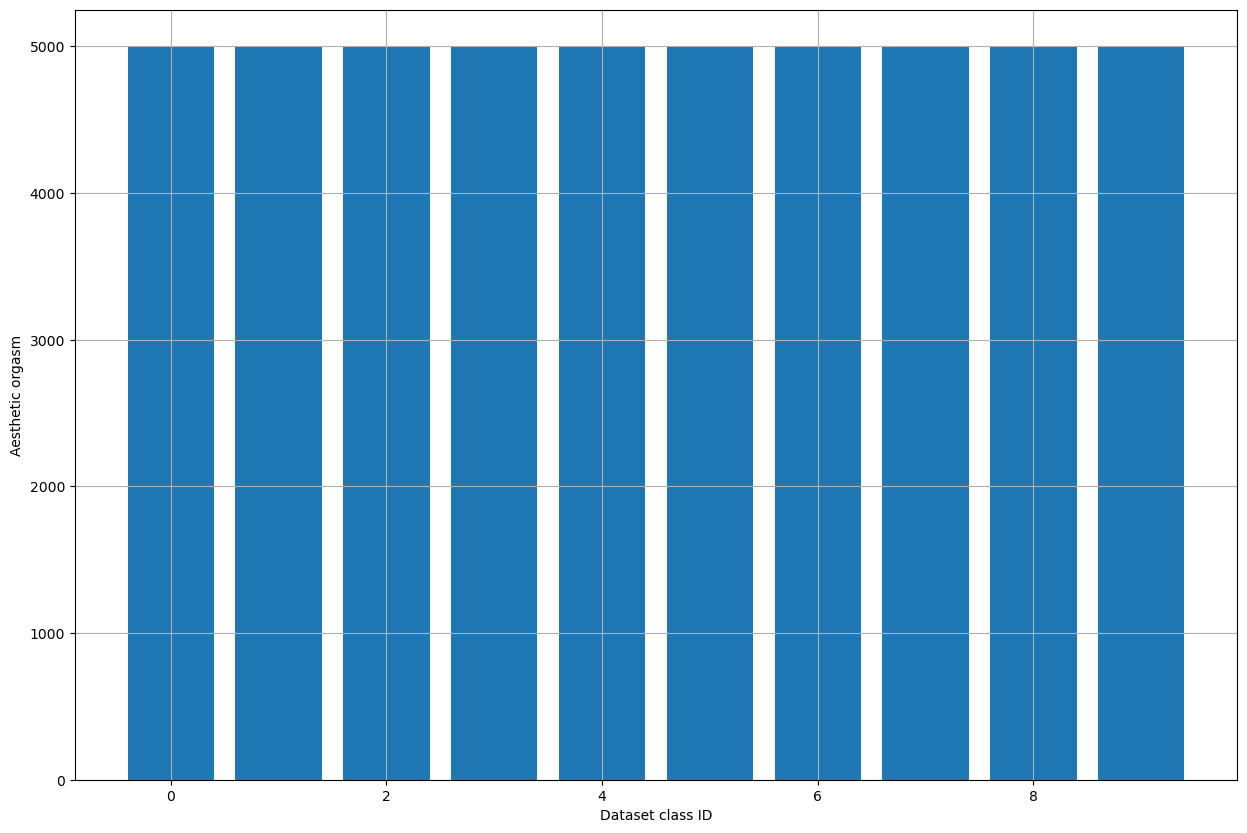

In [3]:
from collections import Counter
hist = y_train.copy()
hist = Counter(hist.reshape(num_samples))

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Dataset class ID'), plt.ylabel('Aesthetic orgasm')

<i>Balanced indeed</i>

In [4]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [5]:
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(5,5), activation="relu", padding="same")(inputs)
net = MaxPooling2D( pool_size = (2,2) )(net)
net = Conv2D(32, kernel_size=(5,5), activation="relu", padding="same")(net)
net = MaxPooling2D( pool_size = (2,2) )(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)


model = Model(inputs, outputs)

# Show the model
model.summary()
#tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0     

In [6]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
352/352 [==============================] - 12s 34ms/step - loss: 1.6473 - accuracy: 0.4139 - val_loss: 1.4862 - val_accuracy: 0.4916
Epoch 2/25
352/352 [==============================] - 12s 33ms/step - loss: 1.3222 - accuracy: 0.5354 - val_loss: 1.2644 - val_accuracy: 0.5636
Epoch 3/25
352/352 [==============================] - 12s 34ms/step - loss: 1.1933 - accuracy: 0.5830 - val_loss: 1.1558 - val_accuracy: 0.6048
Epoch 4/25
352/352 [==============================] - 12s 34ms/step - loss: 1.1130 - accuracy: 0.6134 - val_loss: 1.0947 - val_accuracy: 0.6300
Epoch 5/25
352/352 [==============================] - 12s 34ms/step - loss: 1.0555 - accuracy: 0.6330 - val_loss: 1.0496 - val_accuracy: 0.6436
Epoch 6/25
352/352 [==============================] - 12s 35ms/step - loss: 1.0109 - accuracy: 0.6483 - val_loss: 1.0355 - val_accuracy: 0.6528
Epoch 7/25
352/352 [==============================] - 12s 35ms/step - loss: 0.9676 - accuracy: 0.6666 - val_loss: 1.0758 - val_accuracy:

Train Acc      0.7784888744354248
Validation Acc 0.680400013923645


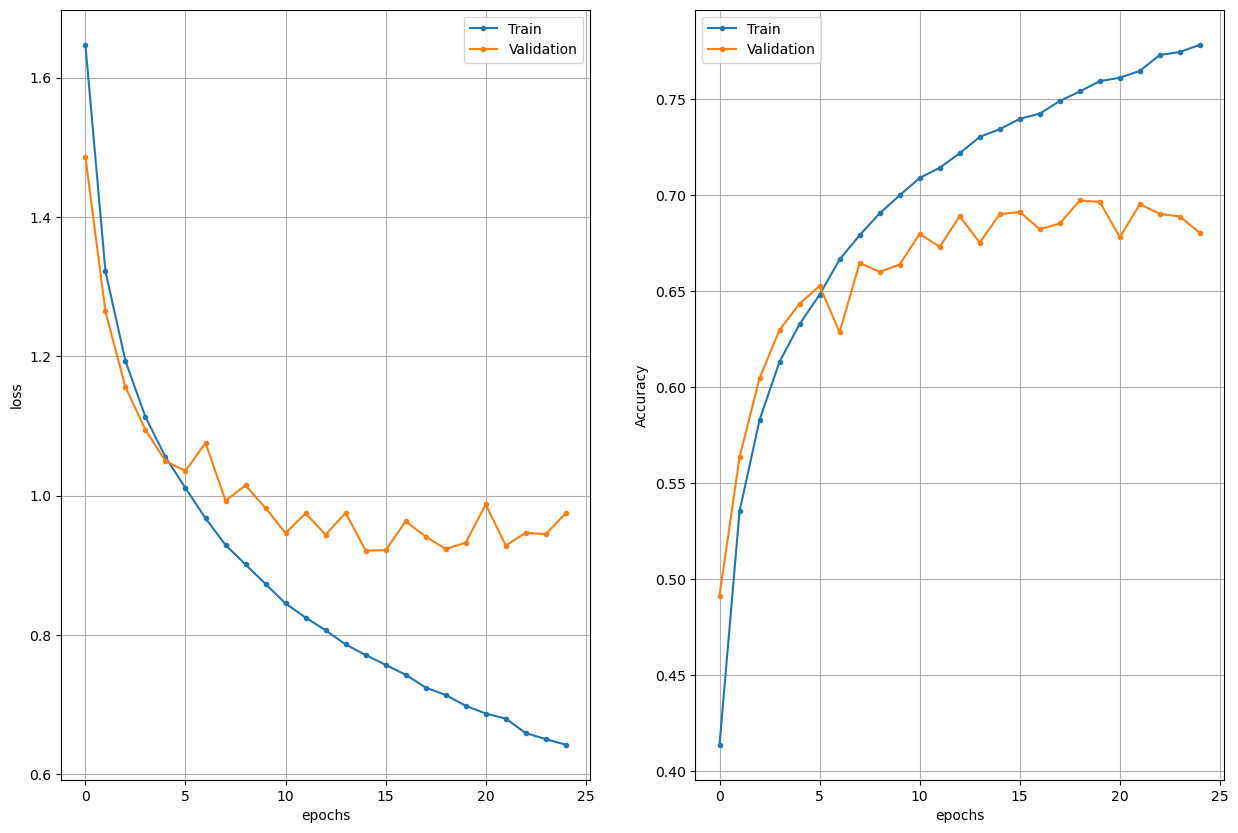

In [7]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

In [8]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_idx = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


In [9]:
print_count = 10
print('True', y_true[0:print_count])
print('Pred', np.argmax(y_pred[0:print_count, :], axis=1))
print('Pred', y_pred[0:print_count, :])
print(y_pred.shape)

True [3 8 8 0 6 6 1 6 3 1]
Pred [3 8 0 0 3 6 1 2 3 1]
Pred [[4.8150583e-03 6.7430310e-04 3.0037870e-03 8.1067538e-01 3.9325189e-04
  8.8722207e-02 9.2613287e-03 1.5280362e-04 7.9630837e-02 2.6711472e-03]
 [1.6136955e-03 1.6679790e-02 4.8708397e-08 5.2474117e-08 3.2884977e-08
  2.3850336e-10 8.5089702e-10 2.0678981e-09 9.8114598e-01 5.6031311e-04]
 [5.0029379e-01 1.0213251e-02 9.3204286e-03 9.7472343e-04 2.7268950e-04
  1.5023313e-04 3.4890894e-04 2.9600930e-04 4.4781661e-01 3.0313432e-02]
 [9.1340375e-01 5.0096013e-02 6.0747587e-03 7.9816056e-04 8.5945107e-04
  2.0540454e-06 3.9374423e-05 8.0518235e-05 2.8261185e-02 3.8473264e-04]
 [7.9042993e-06 2.1436625e-05 6.8797730e-02 6.0570949e-01 5.8176827e-02
  7.0533626e-02 1.9657679e-01 1.0280933e-05 1.1535900e-04 5.0598974e-05]
 [1.4832453e-03 6.2561611e-04 2.7627654e-02 1.0274005e-01 1.3217392e-02
  3.4936181e-01 4.7024402e-01 3.3967972e-02 2.0551433e-05 7.1172958e-04]
 [2.1664479e-03 9.3568730e-01 1.5446292e-04 4.5945324e-02 2.4365996e-05

In [10]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    idxs = np.where(y_true == class_id)[0]
    correct_count = len(np.where(y_pred_idx[idxs] == class_id)[0])
    acc = correct_count/len(idxs)
    print(class_name, acc)

plane 0.767
car 0.795
bird 0.646
cat 0.517
deer 0.597
dog 0.582
frog 0.636
horse 0.708
ship 0.804
truck 0.726


In [11]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.9887 - accuracy: 0.6778
Test loss   0.9886581897735596
Test metric 0.6777999997138977


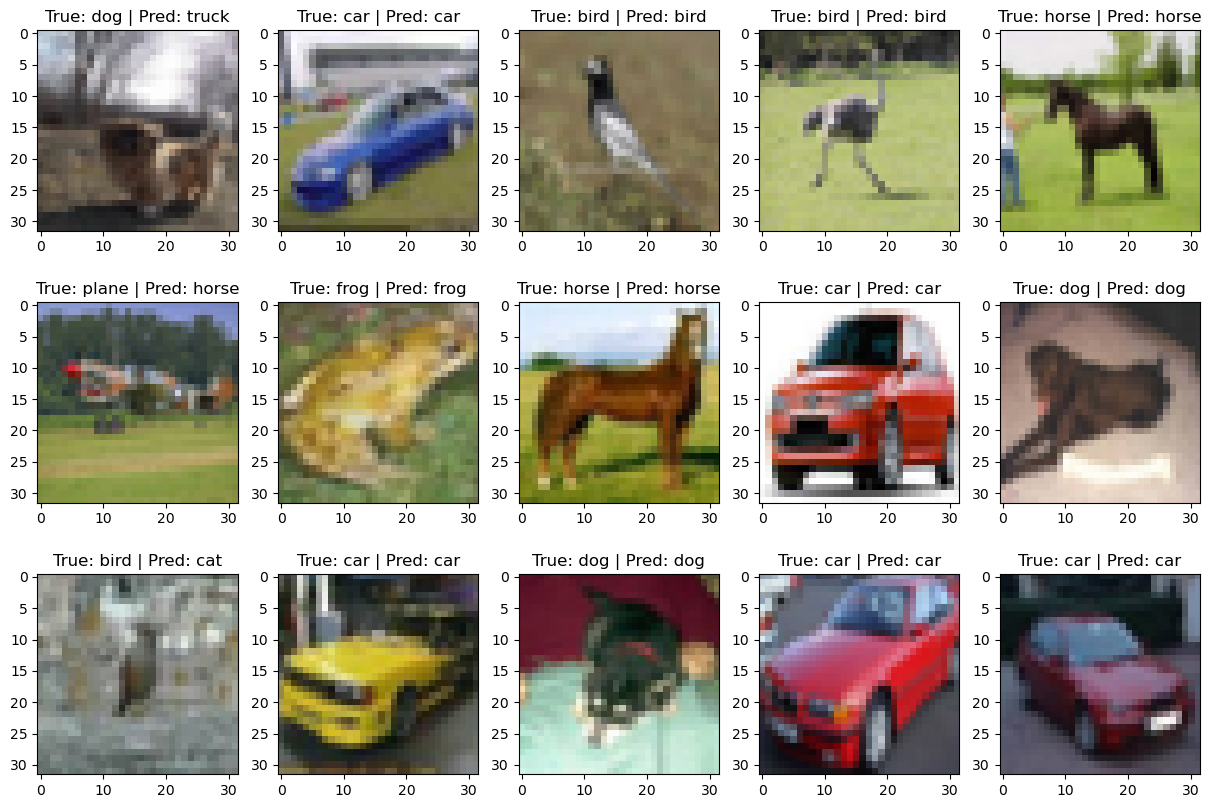

In [12]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred_idx[idx]]))

<h2>Questions</h2>
<b>1. What is the overall accuracy of the classifier?</b><br>
<i>68% what is rather terrible for the network😅 but some classes have worse results - about 55%</i><br><br>
<b>2. What modifications would you do in order to improve the classification accuracy?</b><br>
<i>Hard to answer, lack of experience. But maybe try different architecture of network, amount of kernels or increase kernel size... </i><br><br>
<b>3. Make one modification (that you think can help) and train the classifier again. Does the accuracy improve?</b><br>
<i>I decided to increase kernel size because it was very interesting to see what happens) And accuracy become a bit worse. About 67.8. And training time almost twice longer. So it was a bad idea :D </i><br><br>

<h2>Thanks for viewing!</h2> ❤️️